Today's Objectives:

1) Test Train Splitting

2) Feature Scaling

3) Evaluation

4) Missing Data



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

df = pd.read_csv("/content/miami-housing.csv")
df.drop(['LATITUDE',	'LONGITUDE', 'PARCELNO'], axis = 1, inplace=True)

# `train_test_split(...)`

Every machine learning model takes data as an input. And it consists of the independent values and predict values. Take for example training a model for housing prices. We might have columns like `Squere Feet`, `# of beds`, `distance from highway`, `etc.` nad we use this to predict the column `house price`.

But this is not the best way ... A better way is to split the input data into two different datasets called the Train and test datatsets.

Obviously enough, you use the train dataset to train the model and the test dataset to test the model. 

By doing this, it allows us a way to evaluate the preformece of the model. There are many reason why you want to do this, but ultimately, the goal of machine learning is to develop models that can make accurate predictions on new data. By evaluating the performance of the model on a separate testing set, we can get a better estimate of how well the model will perform in the real world.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df.head()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [4]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

# Feature Scaling

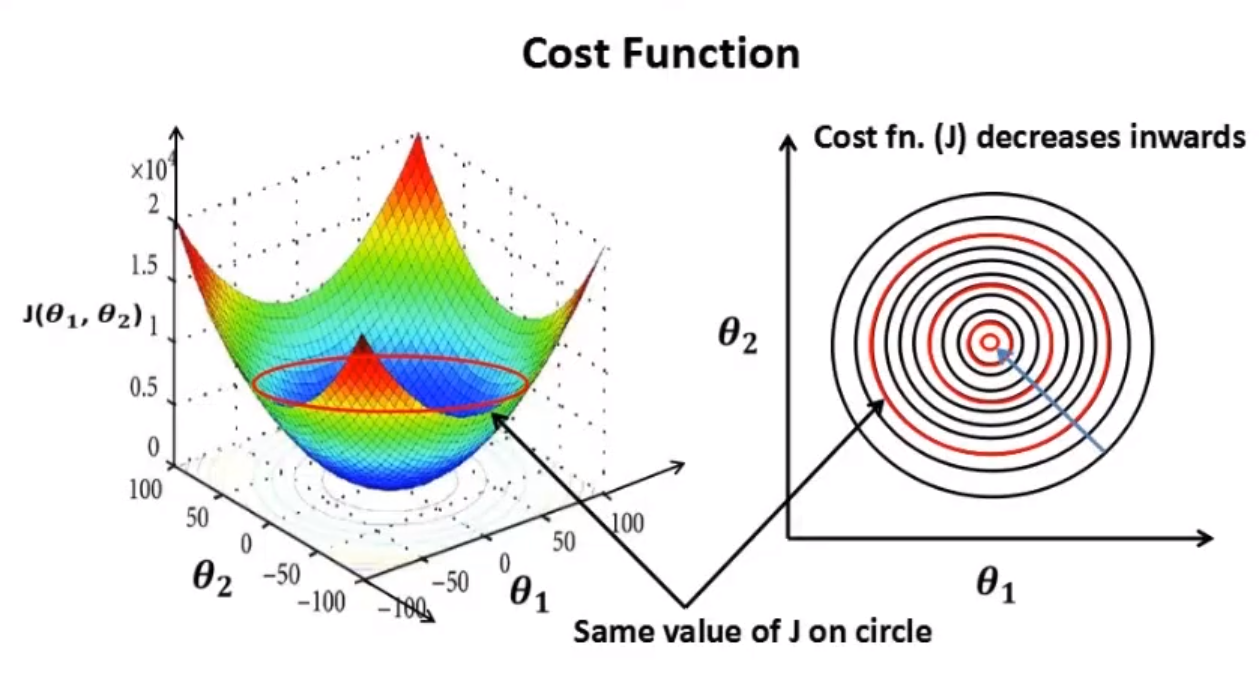

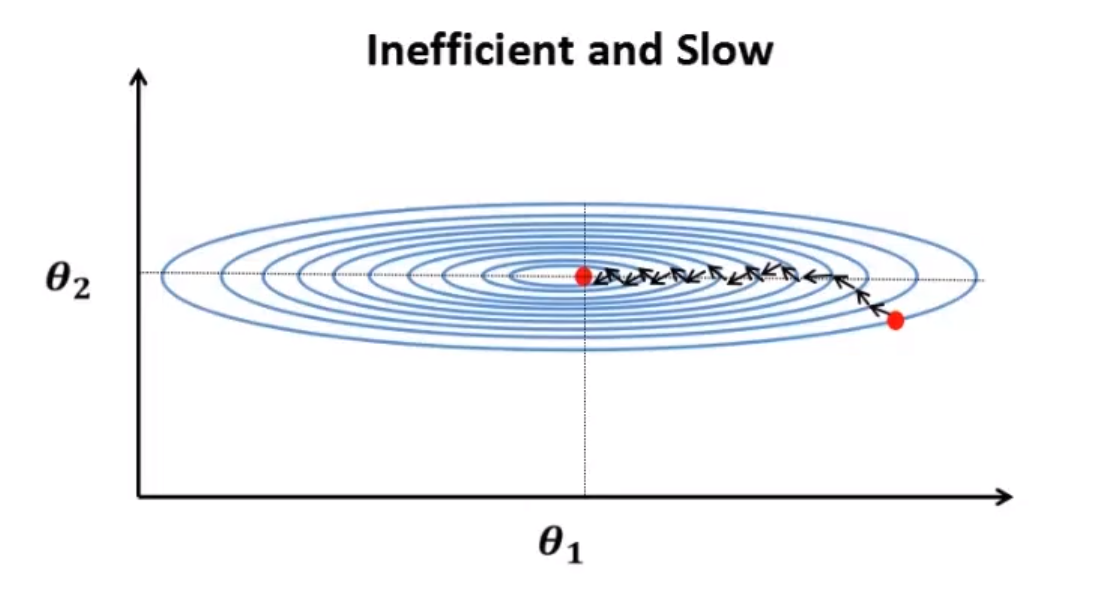

When your features are not scaled to be within the same range the algorithm takes larger steps in the direction of the features with larger scales and smaller steps in the direction of the features with smaller scales. Rescaling the input features to have similar scales can make it easier for the algorithm to take more uniform steps, and can help the optimization process converge faster and with fewer iterations.

In [12]:
from sklearn.preprocessing import StandardScaler

When you standardize data you use the following formula:

$ X = (X - \mu_X) / σ_X $

Essentially you are subtracting the mean value of the feature from each observation and then dividing the result by the standard deviation of the feature. This transformation results in a distribution with a mean of 0 and a standard deviation of 1.

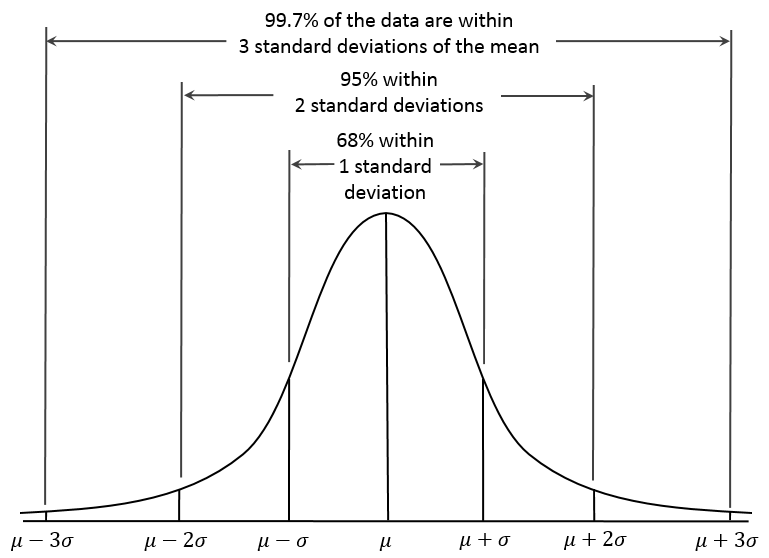

We dont apply to y_test, I'll take about why soon (no pun intended)....

In [16]:
scaler = StandardScaler()
scaler.fit(X_train) # Only fit on X_train, why???
X_train_stan = scaler.transform(X_train)
X_test_stan = scaler.transform(X_test)
scaler2 = StandardScaler()
scaler2.fit(y_train.values.reshape(-1,1))
y_train_stan = scaler2.transform(y_train.values.reshape(-1,1))

The `SGDRegressor` fits a multiple linear regression model using Stochastic Gradient Descent. For out purposes don't worry too much about the stochastic part.

In [10]:
from sklearn.linear_model import SGDRegressor

Here the loss term is set to the MSE, with a constant learning rate of 0.01

In [17]:
reg1 = SGDRegressor(loss='squared_error', penalty=None, learning_rate='constant', eta0=0.01).fit(X_train, y_train)

When training on data that has **NOT BEEN FEATURE SCALED**, the model is pretty bad

In [18]:
reg1.score(X_train, y_train)

-9.551308702829151e+28

In [19]:
reg2 = SGDRegressor(loss='squared_error', penalty=None, learning_rate='constant', eta0=0.01).fit(X_train_stan, y_train_stan)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


But training on strandardized features creates a much better model.

In [20]:
reg2.score(X_train_stan, y_train_stan)

0.6438024272195118

In [29]:
reg2.predict(X_test_stan)

array([-0.15737429,  0.16406514,  0.17770287, ..., -0.61650324,
       -0.16410415,  0.26112066])

We can use `.inverse_transform()` to get real values but undoing the transformation

In [28]:
y_pred = scaler2.inverse_transform(reg2.predict(X_test_stan).reshape(-1,1))
y_pred

array([[348942.05548821],
       [450315.01465824],
       [454615.97011456],
       ...,
       [204145.69445178],
       [346819.64638599],
       [480923.59422676]])

# Evaluation

We have an `X_test` and a `y_test` datatsets. When training the model it never sees this data. So this data serves as a way to help us understnd how the model preforms on data its never seen.

In [30]:
from sklearn.metrics import mean_squared_error, max_error, r2_score

In [31]:
max_error(y_test, y_pred)

1746527.5383042572

In [32]:
mean_squared_error(y_test, y_pred)

37815121897.85238

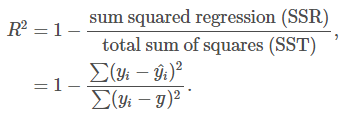

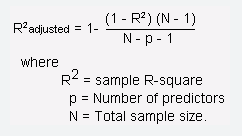

When you add new independent variables to the model, the sum of squared errors will decrease, because the additional variables can capture more of the variation in the dependent variable. As a result, the numerator of the R-squared formula will decrease, which will increase the R-squared value. However, this does not necessarily mean that the new variables are important or significant predictors of the dependent variable.

In [33]:
def adjusted_rsq(actual, predicted, rowc, featurec):
    return 1-(1-r2_score(actual, predicted))*(rowc-1)/(rowc-featurec-1)

In [34]:
adjusted_rsq(y_pred, y_test, X.shape[0], X.shape[1])

0.2355990722208785

## Confusion Matrix

This is a performance measurement for machine learning classification problem where output is of two classes.

In [5]:
df.head()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [9]:
X = df.iloc[:, 4:10]
y = df['avno60plus']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=75, shuffle=True)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stan = scaler.transform(X_train)
X_test_stan = scaler.transform(X_test)

Train a Logistic Rergession Model (same as hw)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression()

In [16]:
log_reg.fit(X_train_stan, y_train)

LogisticRegression()

In [17]:
y_pred = log_reg.predict(X_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

Generate the matrix

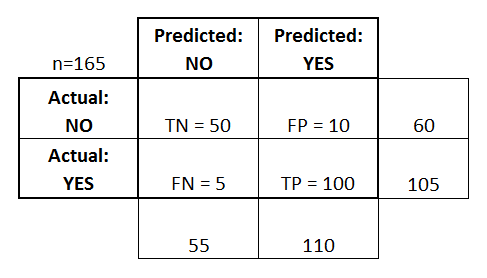

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_test, y_pred)

array([[3422,    5],
       [  56,    0]])

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(3422, 5, 56, 0)

Accuracy: Accuracy is the proportion of correctly classified instances among all instances in the classification. It is calculated as $(TP + TN) / (TP + TN + FP + FN)$. Accuracy measures how well the model can correctly classify both positive and negative instances.

Precision: Precision is the proportion of true positives among all instances classified as positive. It is calculated as $TP / (TP + FP)$. Precision measures how well the model can correctly identify positive instances.

Recall: Recall is the proportion of true positives among all actual positive instances. It is calculated as $TP / (TP + FN)$. Recall measures how well the model can correctly identify all positive instances.

Specificity: Specificity is the proportion of true negatives among all actual negative instances. It is calculated as $TN / (TN + FP)$. Specificity measures how well the model can correctly identify all negative instances.

F1-score: The F1-score is a weighted average of precision and recall, and is often used to balance these two metrics. It is calculated as $2 * (precision * recall) / (precision + recall)$. The F1-score measures the balance between precision and recall, and provides a single metric for evaluating the overall performance of the model.

In [21]:
accuracy = tp + tn / sum([tn, fp, fn, tp])
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * recall) / (precision + recall))
pd.DataFrame({
    'metric': ['accuracy', 'precision', 'recall', 'specificity', 'f1_score'],
    'value': [accuracy, precision, recall, specificity, f1_score]
})

<ipython-input-21-e9d8ed907fcc>:5: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2 * ((precision * recall) / (precision + recall))


,metric,value
0,accuracy,0.982486
1,precision,0.000000
2,recall,0.000000
3,specificity,0.998541
4,f1_score,NaN


Our data is very imbalanced, lets show ths ....

In [38]:
from imblearn.over_sampling import SMOTE

Imblearn is a very powerful library to deal with imbalanced datasets.

https://imbalanced-learn.org/

In [39]:
smote = SMOTE(random_state=42)

Here's how SMOTE works in imblearn:

1) SMOTE starts by selecting a minority class sample at random from the dataset.

2) It then selects k-nearest neighbors (k is a hyperparameter) of the minority sample from the same class.

3) It then generates new synthetic samples by interpolating between the selected minority sample and its k-nearest neighbors. Specifically, it randomly selects one of the k-nearest neighbors, and then generates a synthetic sample by taking a linear combination of the features of the minority sample and the selected neighbor. The amount of interpolation is controlled by a parameter called the sampling ratio.

4) The new synthetic samples are then added to the original dataset to create a new, balanced dataset.

In [40]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [46]:
scaler = StandardScaler()
scaler.fit(X_train_resampled)
X_train_resampled_stan = scaler.transform(X_train_resampled)
X_test_stan = scaler.transform(X_test)

In [60]:
lr = LogisticRegression()

In [61]:
lr.fit(X_train_resampled_stan, y_train_resampled)

LogisticRegression()

In [62]:
y_pred = lr.predict(X_test_stan)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
confusion_matrix(y_test, y_pred)

array([[3223,  204],
       [   0,   56]])

In [65]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(3223, 204, 0, 56)

In [66]:
accuracy = tp + tn / sum([tn, fp, fn, tp])
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * recall) / (precision + recall))
pd.DataFrame({
    'metric': ['accuracy', 'precision', 'recall', 'specificity', 'f1_score'],
    'value': [accuracy, precision, recall, specificity, f1_score]
})

,metric,value
0,accuracy,56.925352
1,precision,0.215385
2,recall,1.000000
3,specificity,0.940473
4,f1_score,0.354430


F1_score is a lot better because precision is the proportion of true positive instances among all instances that are classified as positive by the model, while recall is the proportion of true positive instances among all actual positive instances. A model with high precision may correctly identify most positive instances, but may also incorrectly identify some negative instances as positive. On the other hand, a model with high recall may correctly identify all actual positive instances, but may also miss some positive instances. A high F1-score indicates that the model is performing well in both precision and recall, and that it is correctly identifying most positive instances while avoiding false positives.

In [67]:
from imblearn.over_sampling import RandomOverSampler

In [68]:
ros = RandomOverSampler(random_state=42)

In [69]:
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [70]:
scaler = StandardScaler()
scaler.fit(X_train_resampled)
X_train_resampled_stan = scaler.transform(X_train_resampled)
X_test_stan = scaler.transform(X_test)

In [71]:
lr = LogisticRegression()

In [72]:
lr.fit(X_train_resampled_stan, y_train_resampled)

LogisticRegression()

In [73]:
y_pred = lr.predict(X_test_stan)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [74]:
confusion_matrix(y_test, y_pred)

array([[3221,  206],
       [   0,   56]])

In [75]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(3221, 206, 0, 56)

In [76]:
accuracy = tp + tn / sum([tn, fp, fn, tp])
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * recall) / (precision + recall))
pd.DataFrame({
    'metric': ['accuracy', 'precision', 'recall', 'specificity', 'f1_score'],
    'value': [accuracy, precision, recall, specificity, f1_score]
})

,metric,value
0,accuracy,56.924777
1,precision,0.213740
2,recall,1.000000
3,specificity,0.939889
4,f1_score,0.352201


# Missing Values

In [77]:
df.head()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [115]:
cpdf = df.copy()

In [82]:
cpdf.isna().sum()

SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64

In [116]:
for i in range(0, cpdf.shape[1]):
  x = np.random.choice([2787, 2090, 1393, 697], 1, p=[0.1, 0.25, 0.3, 0.35])
  delete = np.unique(np.random.randint(0, len(df), x))
  cpdf.loc[delete, cpdf.columns[i]] = np.nan

In [117]:
cpdf.isna().sum()

SALE_PRC              683
LND_SQFOOT            681
TOT_LVG_AREA          679
SPEC_FEAT_VAL        1940
RAIL_DIST             685
OCEAN_DIST           1937
WATER_DIST            680
CNTR_DIST             677
SUBCNTR_DI           1943
HWY_DIST              683
age                  1318
avno60plus            680
month_sold            679
structure_quality    1312
dtype: int64

<AxesSubplot:>

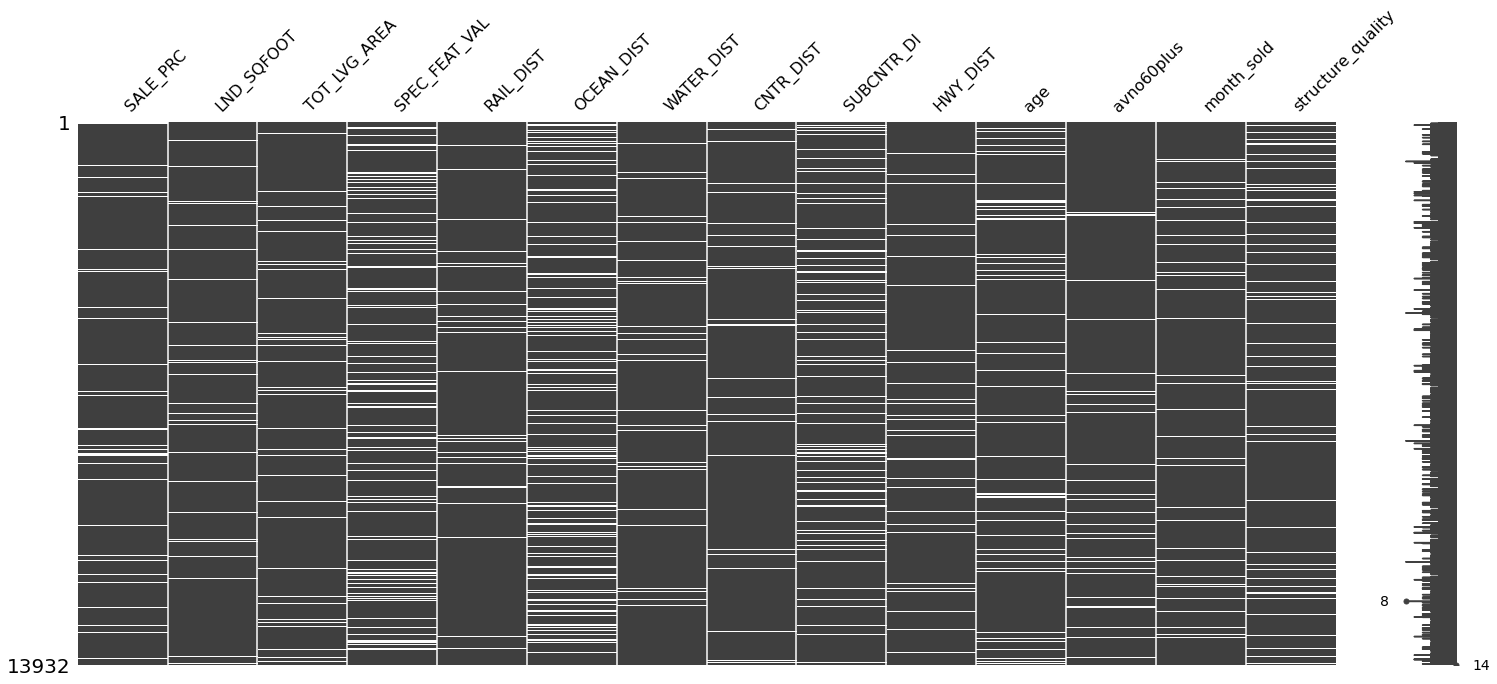

In [122]:
import missingno as msno

msno.matrix(cpdf)

In [119]:
from sklearn.impute import SimpleImputer

In [120]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan, copy=True)

<AxesSubplot:>

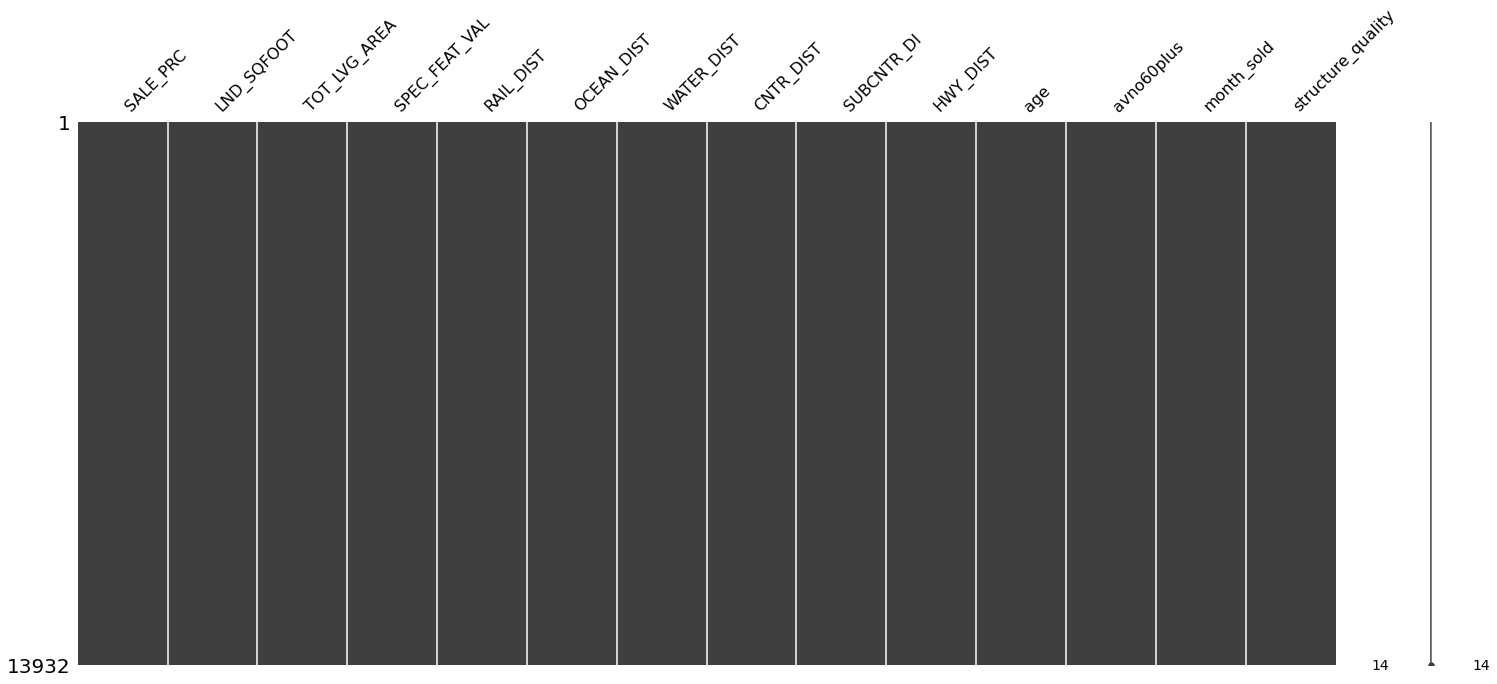

In [124]:
msno.matrix(pd.DataFrame(imputer.fit_transform(cpdf), columns=cpdf.columns))

<AxesSubplot:>

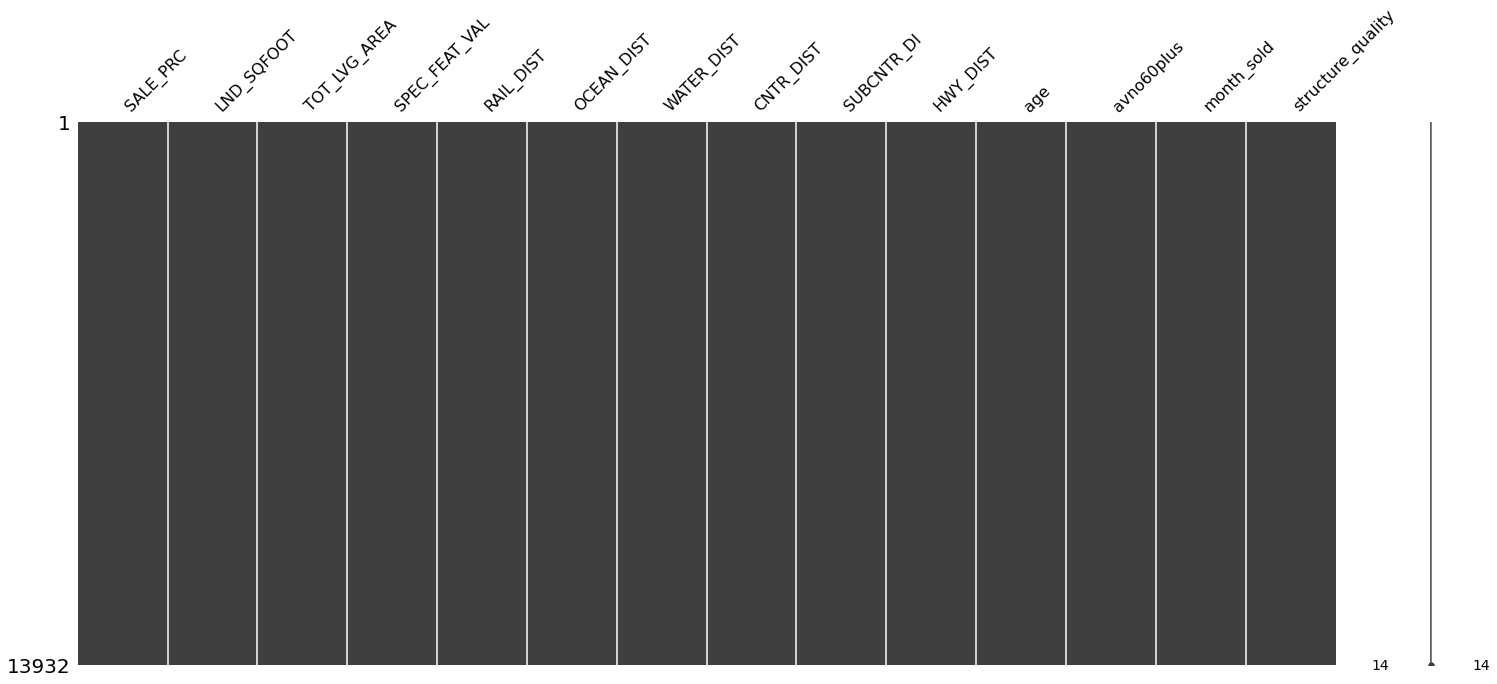

In [125]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan, copy=True)
msno.matrix(pd.DataFrame(imputer.fit_transform(cpdf), columns=cpdf.columns))

The `IterativeImputer` is very powerful, but also still experimental

In [135]:
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [136]:
iimp = IterativeImputer(estimator=BayesianRidge(), max_iter=100, missing_values=np.nan, initial_strategy='median', imputation_order='ascending', random_state=14)

In [137]:
dfarr = iimp.fit_transform(cpdf.copy())

<AxesSubplot:>

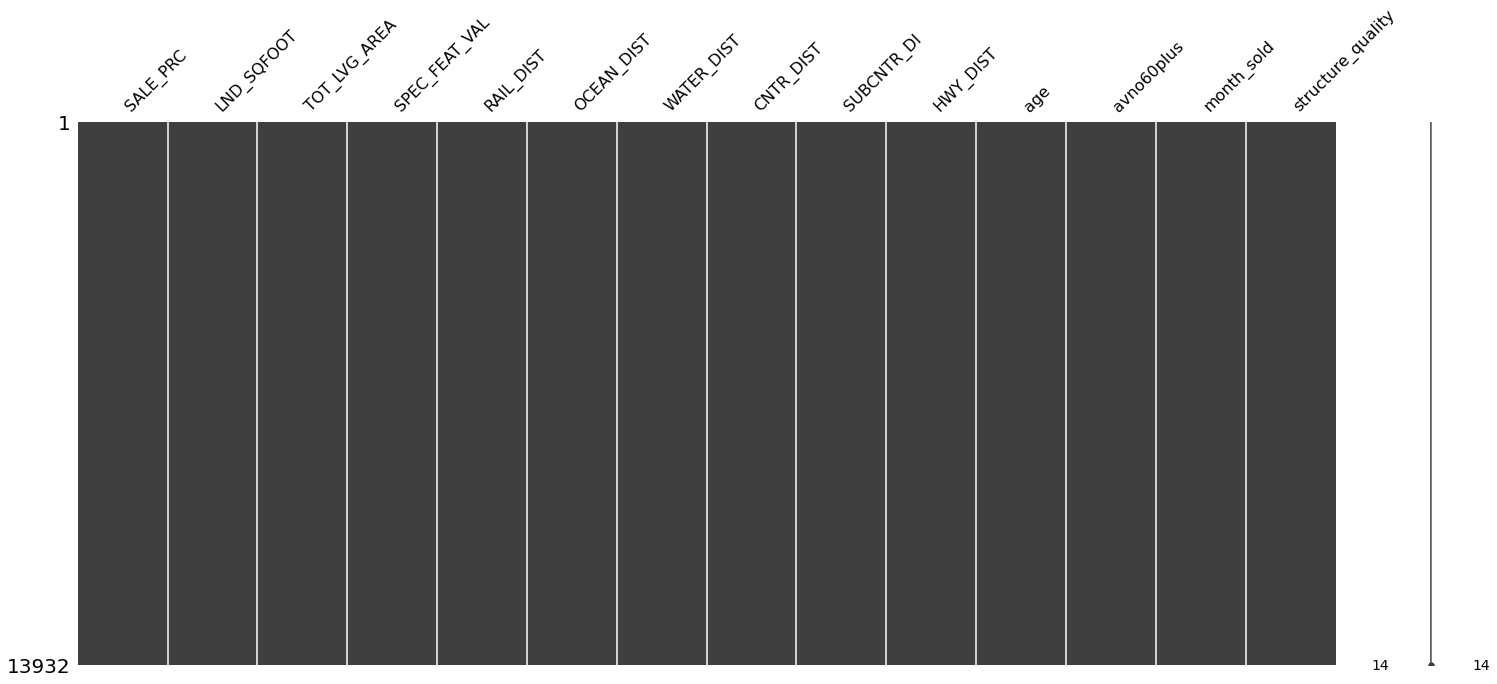

In [138]:
msno.matrix(pd.DataFrame(imputer.fit_transform(dfarr), columns=cpdf.columns))